In [22]:
!pip install opencv-python-headless pillo

In [55]:
#importing necessary libraries
import requests
import os
import numpy as np
from PIL import Image
import cv2

In [56]:
#downloading haar cascade front face xml
xml = requests.get('https://github.com/opencv/opencv/blob/master/data/haarcascades/haarcascade_frontalcatface.xml', stream=True)
with open('face.xml', 'wb') as file_:
  for block in xml.iter_content(chunk_size=1024):
    if block:
      file_.write(block)

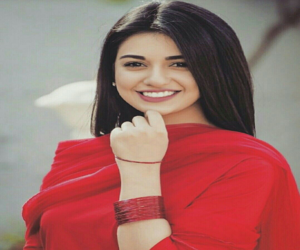

In [57]:
# face 1 - female
# loading, resizing & saving the image
image = Image.open(requests.get('https://i.pinimg.com/originals/46/f8/c6/46f8c6d2bf4d87032fd3ce90d49b9854.jpg', stream=True).raw)
image = image.resize((300, 250))
image_arr = np.array(image)
image.save('sample_female.png')
image

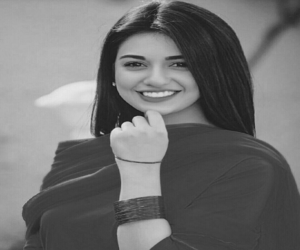

In [58]:
#preprocessing the image
grey = cv2.cvtColor(image_arr, cv2.COLOR_BGR2GRAY)
Image.fromarray(grey)

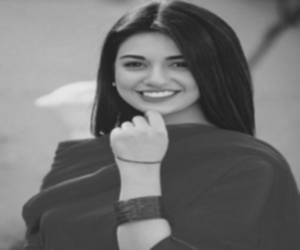

In [59]:
blur = cv2.GaussianBlur(grey, (3, 3), 0)
Image.fromarray(blur)

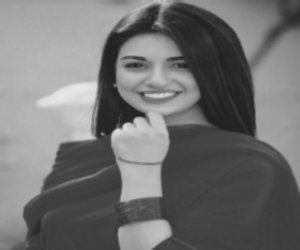

In [60]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
closing = cv2.morphologyEx(blur, cv2.MORPH_CLOSE, kernel)
Image.fromarray(closing)

In [61]:
#defining classifier and detecting
classifier = cv2.CascadeClassifier('/content/haarcascade_frontalface_alt.xml')
face = classifier.detectMultiScale(closing, 1.1, 1)

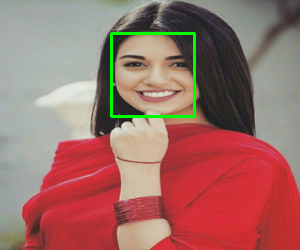

In [62]:
#drawing box around detected face
image = Image.open('sample_female.png')
image = np.array(image)
for (x, y, w, h) in face:
  img = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
Image.fromarray(img)

In [63]:
# face 2 - male
# image loading and resizing
image2 = Image.open(requests.get('https://images.pexels.com/photos/2379005/pexels-photo-2379005.jpeg?auto=compress&cs=tinysrgb&w=400', stream=True).raw)
image2 = image2.resize((350, 250))
image_arr2 = np.array(image2)
image2.save('sample_male.png')

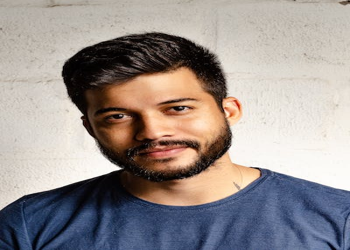

In [64]:
Image.fromarray(image_arr2)

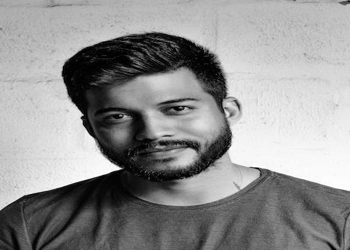

In [65]:
#image loading and preprocessing
grey = cv2.cvtColor(image_arr2, cv2.COLOR_BGR2GRAY)
Image.fromarray(grey)

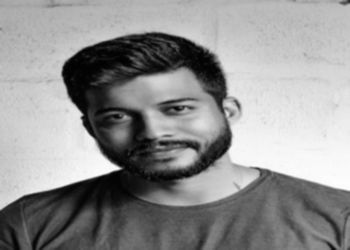

In [66]:
blur = cv2.GaussianBlur(grey, (3, 3), 0)
Image.fromarray(blur)

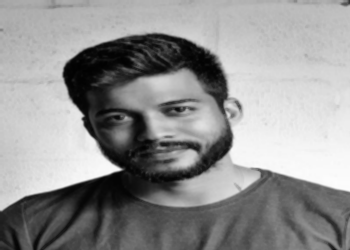

In [67]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
closing = cv2.morphologyEx(blur, cv2.MORPH_CLOSE, kernel)
Image.fromarray(closing)

In [68]:
#loading and detecting with classifier
classifier = cv2.CascadeClassifier('/content/haarcascade_frontalface_alt.xml')
face = classifier.detectMultiScale(grey, 1.1, 1)

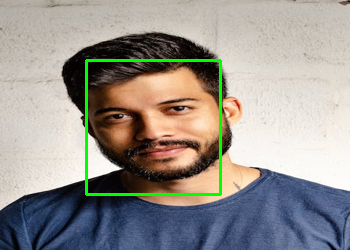

In [69]:
#drawing boxes around detected face
image2 = Image.open('sample_male.png')
image2 = np.array(image2)
for (x, y, w, h) in face:
  img = cv2.rectangle(image2, (x, y), (x + w, y + h), (0, 255, 0), 2)
Image.fromarray(img)